# Q-learning, Sarsa Demo

## flow
- define the maze
- define theta for initial policy 
- convert theta into policy_0
- initialize Q-function
- define Sarsa and Q-learning
- define play_maze function
- main function
- visualize V (state-value function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## define the maze

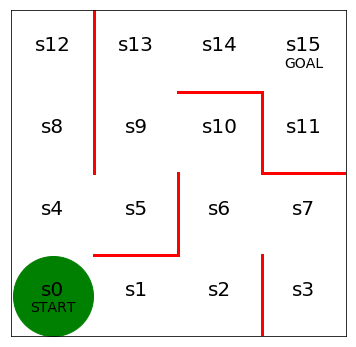

In [2]:
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()

# draw red wall
plt.plot([3, 4], [2, 2], color='red', linewidth=3)
plt.plot([2, 2], [1, 2], color='red', linewidth=3)
plt.plot([1, 1], [2, 4], color='red', linewidth=3)
plt.plot([1, 2], [1, 1], color='red', linewidth=3)
plt.plot([2, 3], [3, 3], color='red', linewidth=3)
plt.plot([3, 3], [2, 3], color='red', linewidth=3)
plt.plot([3, 3], [0, 1], color='red', linewidth=3)

# -- describe the state number
s_num = 0
for j in range(4):
    for i in range(4):
        plt.text(i+0.5, j+0.5, 's{}'.format(s_num), size=20, ha='center')
        s_num += 1
        
# -- setup the START and GOAL
plt.text(0.5, 0.3, 'START', ha='center', fontsize=14)
plt.text(3.5, 3.3, 'GOAL', ha='center', fontsize=14)

# -- reformat size
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# -- render the green circle in current state (initial state is START)
line, = ax.plot([0.5], [0.5], marker="o", color='g', markersize=80)

## define theta 

In [3]:
# - define the theta for initial policy by Tabler Representative
#                 ["UP"  , "RIGHT", "DOWN", "LEFT"]
theta = np.array([[1     , 1      , np.nan, np.nan], #s0
                  [np.nan, 1      , np.nan, 1     ], #s1
                  [1     , np.nan , np.nan, 1     ], #s2
                  [1     , np.nan , np.nan, np.nan], #s3
                  [1     , 1      , 1     , np.nan], #s4
                  [1     , np.nan , np.nan, 1     ], #s5
                  [1     , 1      , 1     , np.nan], #s6
                  [np.nan, np.nan , 1     , 1     ], #s7
                  [1     , np.nan , 1     , np.nan], #s8
                  [1     , 1      , 1     , np.nan], #s9
                  [np.nan, np.nan , 1     , 1     ], #s10
                  [1     , np.nan , np.nan, np.nan], #s11
                  [np.nan, np.nan , 1     , np.nan], #s12
                  [np.nan, 1      , 1     , np.nan], #s13
                  [np.nan, 1      , np.nan, 1     ], #s14
])

## convert theta into Policy Pi

In [4]:
def convert_theta_into_pi(theta):
    
    i, j = theta.shape
    pi = np.zeros((i, j))
    for row in range(i):
        # get probability of action
        pi[row] = theta[row] / np.nansum(theta[row])
        
    pi = np.nan_to_num(pi)
    return pi

pi_0 = convert_theta_into_pi(theta)
print(pi_0)

[[0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.5       ]
 [0.5        0.         0.         0.5       ]
 [1.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]]


## initialize Q function

In [5]:
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
# In order to avoid miss action in early exeperiments,
# multiplying 0.1 

print(Q)

[[9.96100312e-02 8.35897188e-02            nan            nan]
 [           nan 9.27975662e-02            nan 5.42642314e-02]
 [5.36859467e-02            nan            nan 1.43387942e-02]
 [4.49174756e-02            nan            nan            nan]
 [9.51702224e-02 9.43810482e-02 8.10745185e-02            nan]
 [1.15731239e-04            nan            nan 1.63159838e-02]
 [3.11257794e-02 4.51823736e-02 2.94481497e-02            nan]
 [           nan            nan 9.99113168e-02 6.39827803e-02]
 [1.80819322e-02            nan 6.57580115e-02            nan]
 [8.00122403e-03 1.80096455e-02 8.50571814e-02            nan]
 [           nan            nan 7.63493722e-04 5.44065214e-02]
 [1.17196961e-02            nan            nan            nan]
 [           nan            nan 4.72272730e-02            nan]
 [           nan 4.28023794e-02 3.55307819e-02            nan]
 [           nan 5.25898491e-05            nan 1.08190433e-02]]


In [6]:
def get_next_action(s, Q, pi, epsilon) -> str:
    # return 'UP', 'DOWN', 'RIGHT', 'LEFT'
    
    # epsilon-greedy
    if np.random.rand() < epsilon:
        next_action = np.random.choice(list(directions), p=pi[s, :])
    else:
        next_action = list(directions)[np.nanargmax(Q[s, :])] 
        
    return next_action

def get_s_next(s, next_a) -> int:
    # return state num
    
    for idx, act in enumerate(directions):
        if act == next_a:
            return s + directions[act]
        

In [7]:
# - test
# s = 9
# next_a = get_next_action(s, Q, pi_0, 0.3)
# print("next_action is {}".format(next_a))
# next_s = get_s_next(s, next_a)
# print("next state is {}".format(next_s))

## define Sarsa

In [8]:
def Sarsa(Q, s, a, r, s_next, a_next, eta, gamma):

    a_col = action2col[a]
    if s_next == 15:  # goal
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])

    else:
        a_next_col = action2col[a_next]
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * Q[s_next, a_next_col] - Q[s, a_col])

    return Q.copy()

## define Q learning

In [9]:
def update_q_table(Q, s, a, r, s_next, eta, gamma):
    
    a_col = action2col[a]
    if s_next == 15:
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])
        return Q.copy()
    else:
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a_col])
        return Q.copy()

In [10]:
def play_maze(Q, pi, epsilon, eta, gamma, update_method="q_learning"):
    # return state_action_history, updated Q function
    s = 0
    s_a_history = [[0, np.nan]]
    # substitute action later
    
    trial_num  = 0
    a_next = get_next_action(s, Q, pi, epsilon)
    # selecting action
    
    while True:
        # print("current state: {}, next action : {}".format(s, action))
        action = a_next 
        
        trial_num += 1
        
        s_a_history[-1][1] = action
        
        s_next = get_s_next(s=s, next_a=action)
       
        s_a_history.append([s_next, np.nan])
        
        if s_next == 15:
            r = 1
            a_next = None
        else:
            r = 0
            a_next = get_next_action(s_next, Q, pi, epsilon)
        
        if update_method == "sarsa":
            Q = Sarsa(Q, s, action, r, s_next, a_next, eta, gamma)
            
        elif update_method == "q_learning":
            Q = update_q_table(Q, s, action, r, s_next, eta, gamma)
        
        if s_next == 15:
            break
        else:
            s = s_next
        
    return s_a_history, Q


In [33]:
# - define the const

eta = 0.1   # learning rate
GAMMA = 0.9 # discount rate
epsilon = 0.5
continue_flg = True
episode = 1
max_episode = 100
directions = {'UP'   :  4,
              'RIGHT':  1,
              'DOWN' : -4,
              'LEFT' : -1
             }

action2col = { act: col for col,act in enumerate(directions) }
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
initial_Q = Q.copy()
Q_sarsa = Q.copy()
Q_Qlearning = Q.copy()
# get transition V function by time step
V_sarsa = np.nanmax(Q, axis=1).reshape(1, -1)
V_Qlearning = np.nanmax(Q, axis=1).reshape(1, -1)

while continue_flg:
    
    print("========== Episode: {} ==========".format(episode))
    epsilon /= 1.1
    # more exploration in earlier experices 
    
    s_a_history_sarsa    , new_Q_sarsa     = play_maze(Q_sarsa    , pi_0, epsilon, eta, GAMMA, update_method="sarsa")
    s_a_history_Qlearning, new_Q_Qlearning = play_maze(Q_Qlearning, pi_0, epsilon, eta, GAMMA)
    
    new_v_sarsa     = np.nanmax(new_Q_sarsa    , axis=1).reshape(1, -1)
    new_v_Qlearning = np.nanmax(new_Q_Qlearning, axis=1).reshape(1, -1)
    
    V_sarsa     = np.append(V_sarsa    , new_v_sarsa, axis=0)
    V_Qlearning = np.append(V_Qlearning, new_v_Qlearning, axis=0)
    
    Q_sarsa     = new_Q_sarsa.copy()
    Q_Qlearning = new_Q_Qlearning.copy()
    
    print("Sarsa step size in this trial is {}.".format(len(s_a_history_sarsa)-1))
    print("Q-learning step size in this trial is {}.".format(len(s_a_history_sarsa)-1))
    
    episode += 1
    if episode >= max_episode:
        continue_flg = False

# - reformat V for visualizing
v_16 = np.ones((100,1))
V_sarsa = np.concatenate((V_sarsa, v_16), axis=1).reshape(-1, 4, 4)
V_Qlearning = np.concatenate((V_Qlearning, v_16), axis=1).reshape(-1, 4, 4)

========== Episode: 1 ==========
Sarsa step size in this trial is 422.
Q-learning step size in this trial is 422.
========== Episode: 2 ==========
Sarsa step size in this trial is 74.
Q-learning step size in this trial is 74.
========== Episode: 3 ==========
Sarsa step size in this trial is 140.
Q-learning step size in this trial is 140.
========== Episode: 4 ==========
Sarsa step size in this trial is 284.
Q-learning step size in this trial is 284.
========== Episode: 5 ==========
Sarsa step size in this trial is 630.
Q-learning step size in this trial is 630.
========== Episode: 6 ==========
Sarsa step size in this trial is 48.
Q-learning step size in this trial is 48.
========== Episode: 7 ==========
Sarsa step size in this trial is 68.
Q-learning step size in this trial is 68.
========== Episode: 8 ==========
Sarsa step size in this trial is 8.
Q-learning step size in this trial is 8.
========== Episode: 9 ==========
Sarsa step size in this trial is 24.
Q-learning step size in this

# Investigate the differences between q-learning and Sarsa

In [34]:
from matplotlib.animation import FuncAnimation

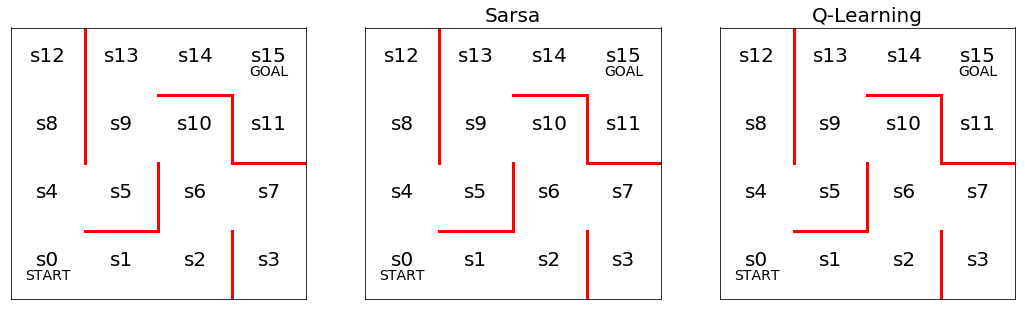

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

ax2.set_title("Sarsa",fontsize=20)
ax3.set_title("Q-Learning",fontsize=20)
for ax in [ax1, ax2, ax3]:
    ax.plot([2.5, 3.5], [1.5 , 1.5], color='red', linewidth=3)
    ax.plot([1.5, 1.5], [0.5 , 1.5], color='red', linewidth=3)
    ax.plot([0.5, 0.5], [1.5 , 3.5], color='red', linewidth=3)
    ax.plot([0.5, 1.5], [0.5 , 0.5], color='red', linewidth=3)
    ax.plot([1.5, 2.5], [2.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [1.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [-0.5, 0.5], color='red', linewidth=3)
    ax.text(0, -0.2, 'START', ha='center', fontsize=14)
    ax.text(3, 2.8, 'GOAL', ha='center', fontsize=14)

    # -- reformat size
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    # -- describe the state number
    s_num = 0
    for j in range(4):
        for i in range(4):
            ax.text(i, j, 's{}'.format(s_num), size=20, ha='center')
            s_num += 1

    ax.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)


In [36]:
def update(i):
    ax1.set_title("episode: {}".format(i+1),fontsize=20)
    img1 = ax2.imshow(V_sarsa[i])
    img2 = ax3.imshow(V_Qlearning[i])

anim = FuncAnimation(fig, update, interval=100 ,frames=len(V_sarsa))
anim.save("V_transition.mp4", writer="ffmpeg")

## maze with Hole

In [24]:
def play_maze(Q, pi, epsilon, eta, gamma, update_method="q_learning", hole_flg=False):
    # return state_action_history, updated Q function
    s = 0
    s_a_history = [[0, np.nan]]
    # substitute action later
    
    trial_num  = 0
    a_next = get_next_action(s, Q, pi, epsilon)
    # selecting action
    
    while True:
        # print("current state: {}, next action : {}".format(s, action))
        action = a_next 
        
        trial_num += 1
        
        s_a_history[-1][1] = action
        
        s_next = get_s_next(s=s, next_a=action)
       
        s_a_history.append([s_next, np.nan])
        
        if s_next == 15:
            r = 1
            a_next = None
        elif s_next == 5 and hole_flg:
            r = -0.05
            a_next = get_next_action(s_next, Q, pi, epsilon)
        else:
            r = 0
            a_next = get_next_action(s_next, Q, pi, epsilon)
        
        if update_method == "sarsa":
            Q = Sarsa(Q, s, action, r, s_next, a_next, eta, gamma)
            
        elif update_method == "q_learning":
            Q = update_q_table(Q, s, action, r, s_next, eta, gamma)
        
        if s_next == 15:
            break
        else:
            s = s_next
        
    return s_a_history, Q


In [30]:
# - define the const

eta = 0.1   # learning rate
GAMMA = 0.9 # discount rate
epsilon = 0.5
continue_flg = True
episode = 1
max_episode = 100
directions = {'UP'   :  4,
              'RIGHT':  1,
              'DOWN' : -4,
              'LEFT' : -1
             }

action2col = { act: col for col,act in enumerate(directions) }
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
initial_Q = Q.copy()
Q_sarsa = Q.copy()
Q_Qlearning = Q.copy()
V_sarsa = np.nanmax(Q, axis=1).reshape(1, -1)
V_Qlearning = np.nanmax(Q, axis=1).reshape(1, -1)

while continue_flg:
    
    print("========== Episode: {} ==========".format(episode))
    epsilon /= 1.1
    # more exploration in earlier experices 
    
    if episode > 30:
        hole_flg = True
    else:
        hole_flg = False
        
    s_a_history_sarsa    , new_Q_sarsa     = play_maze(Q_sarsa, pi_0, epsilon, eta, 
                                                       GAMMA, update_method="sarsa", hole_flg=hole_flg)
    s_a_history_Qlearning, new_Q_Qlearning = play_maze(Q_Qlearning, pi_0, epsilon, eta, 
                                                       GAMMA,update_method="q_learning", hole_flg=hole_flg)

    new_v_sarsa     = np.nanmax(new_Q_sarsa    , axis=1).reshape(1, -1)
    new_v_Qlearning = np.nanmax(new_Q_Qlearning, axis=1).reshape(1, -1)
    
    V_sarsa     = np.append(V_sarsa    , new_v_sarsa, axis=0)
    V_Qlearning = np.append(V_Qlearning, new_v_Qlearning, axis=0)
    
    Q_sarsa     = new_Q_sarsa.copy()
    Q_Qlearning = new_Q_Qlearning.copy()
    
    print("Sarsa step size in this trial is {}.".format(len(s_a_history_sarsa)-1))
    print("Q-learning step size in this trial is {}.".format(len(s_a_history_sarsa)-1))
    
    episode += 1
    if episode >= max_episode:
        continue_flg = False

# - reformat V for visualizing
v_16 = np.ones((100,1))
V_sarsa = np.concatenate((V_sarsa, v_16), axis=1).reshape(-1, 4, 4)
V_Qlearning = np.concatenate((V_Qlearning, v_16), axis=1).reshape(-1, 4, 4)

========== Episode: 1 ==========
Sarsa step size in this trial is 18.
Q-learning step size in this trial is 18.
========== Episode: 2 ==========
Sarsa step size in this trial is 44.
Q-learning step size in this trial is 44.
========== Episode: 3 ==========
Sarsa step size in this trial is 34.
Q-learning step size in this trial is 34.
========== Episode: 4 ==========
Sarsa step size in this trial is 32.
Q-learning step size in this trial is 32.
========== Episode: 5 ==========
Sarsa step size in this trial is 12.
Q-learning step size in this trial is 12.
========== Episode: 6 ==========
Sarsa step size in this trial is 6.
Q-learning step size in this trial is 6.
========== Episode: 7 ==========
Sarsa step size in this trial is 6.
Q-learning step size in this trial is 6.
========== Episode: 8 ==========
Sarsa step size in this trial is 10.
Q-learning step size in this trial is 10.
========== Episode: 9 ==========
Sarsa step size in this trial is 8.
Q-learning step size in this trial is 8

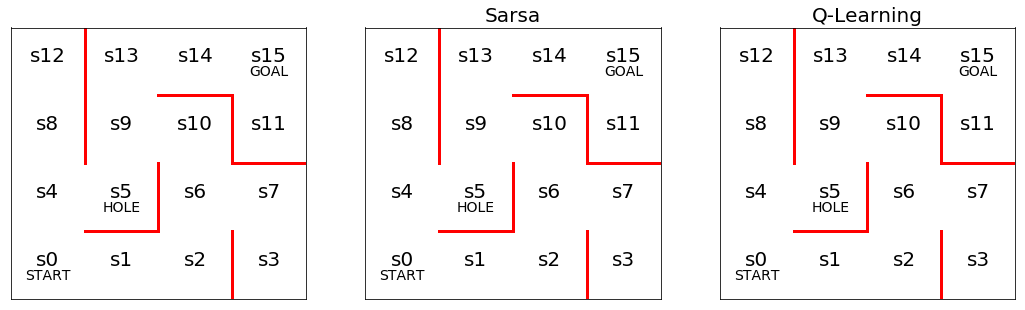

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

ax2.set_title("Sarsa",fontsize=20)
ax3.set_title("Q-Learning",fontsize=20)
for ax in [ax1, ax2, ax3]:
    ax.plot([2.5, 3.5], [1.5 , 1.5], color='red', linewidth=3)
    ax.plot([1.5, 1.5], [0.5 , 1.5], color='red', linewidth=3)
    ax.plot([0.5, 0.5], [1.5 , 3.5], color='red', linewidth=3)
    ax.plot([0.5, 1.5], [0.5 , 0.5], color='red', linewidth=3)
    ax.plot([1.5, 2.5], [2.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [1.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [-0.5, 0.5], color='red', linewidth=3)
    ax.text(1.0, 0.8, 'HOLE', ha='center', fontsize=14)
    ax.text(0, -0.2, 'START', ha='center', fontsize=14)
    ax.text(3, 2.8, 'GOAL', ha='center', fontsize=14)

    # -- reformat size
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    # -- describe the state number
    s_num = 0
    for j in range(4):
        for i in range(4):
            ax.text(i, j, 's{}'.format(s_num), size=20, ha='center')
            s_num += 1

    ax.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)


In [32]:
anim = FuncAnimation(fig, update, interval=100 ,frames=len(V_sarsa))
anim.save("V_transition_with_hole.mp4", writer="ffmpeg")